# GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)

In [1]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import seaborn

import json
import os
#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


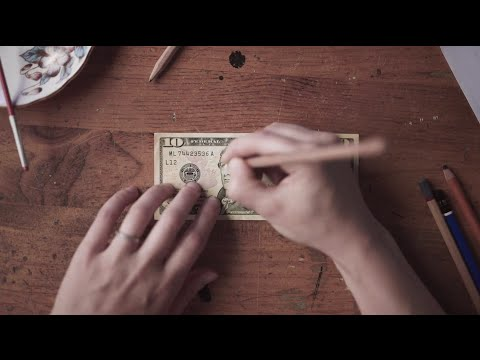

In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

1. Create two python dictionaries to store your data.
     allmales = ...
stores the male data
    allfemales = ...
stores the female data
each dictionary needs to have 5 key-pair values with keys: 'all', 'white', 'black', 'hispanic', 'asian' each value should contain a dataframe read with the pandas read_excel function directly from the url.
should contain

In [5]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

ethnicities = ['_1_1', '_1_4', '_1_6', '_1_8', '_1_9']
keys = ['all', 'white', 'black', 'asian', 'hispanic']

               
def load_dict(gender_code, dict_name):
    '''
    Populates the dictionary for each gender given gender code. Uses a 9 row header buffer as the real data begins at row 10
    on the excel document for (most) of the columns
    '''
    values = []
    for ethnicity in ethnicities: 
        values.append(pd.read_excel(url + 'pinc' + gender_code + ethnicity + '.xls', header=9))
    dict_name = dict(zip(keys, values))
    return dict_name

In [6]:
allmales = load_dict('08_2', 'allmales')
allfemales = load_dict('08_3', 'allfemales')

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [8]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [9]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [10]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 

In [11]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

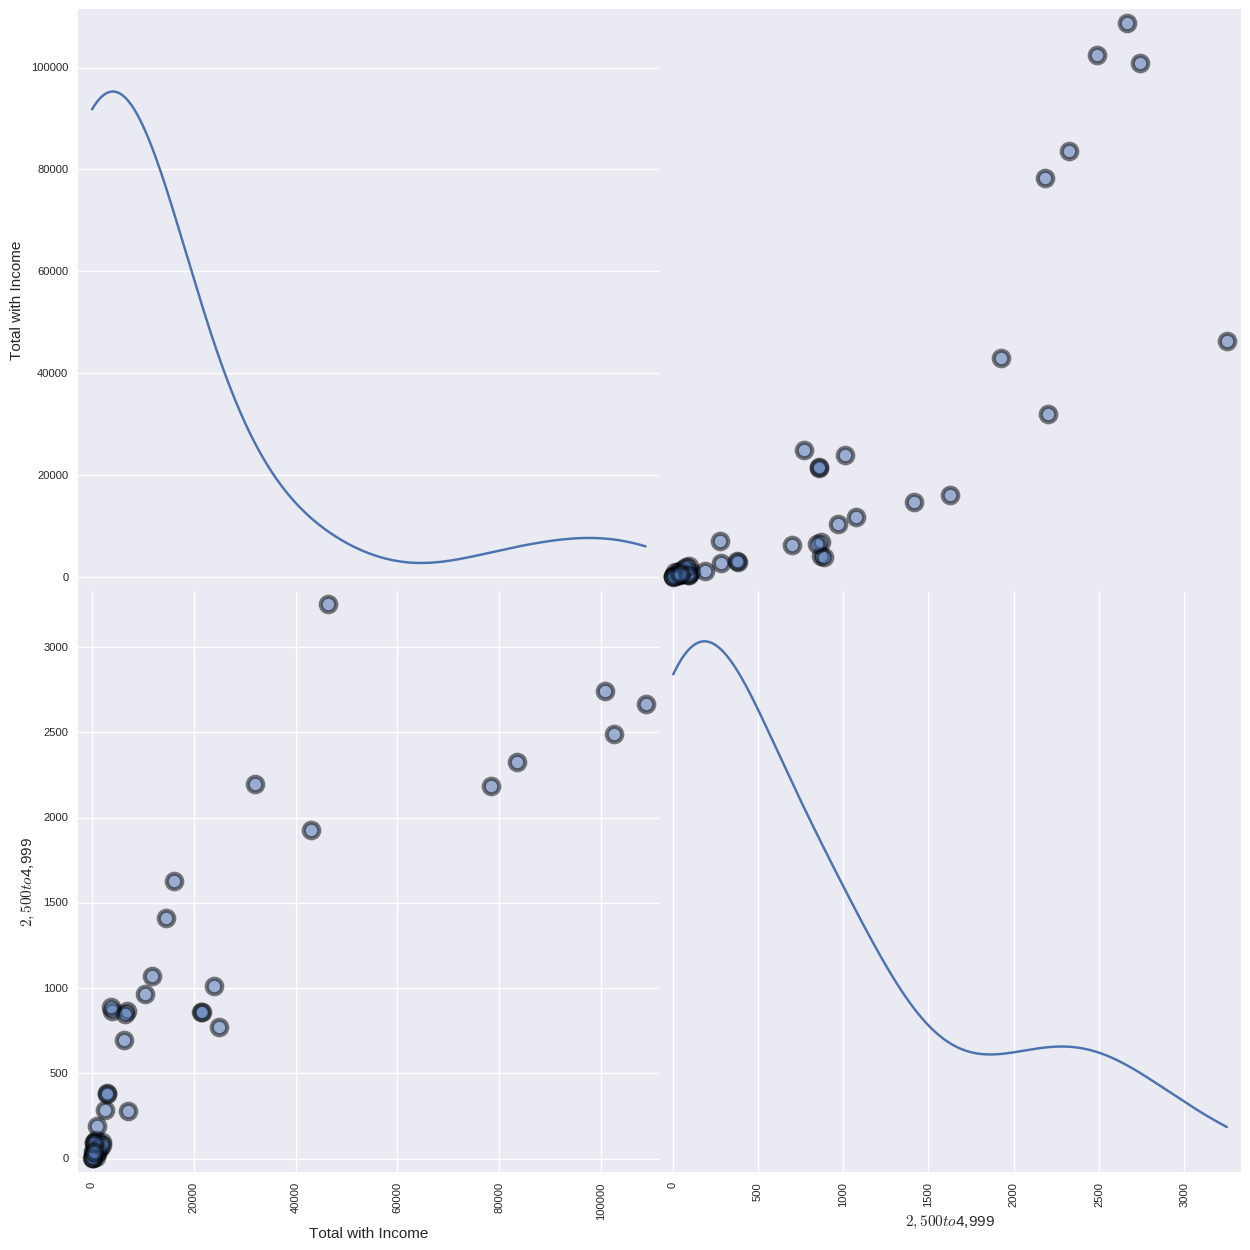

In [12]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [13]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [14]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

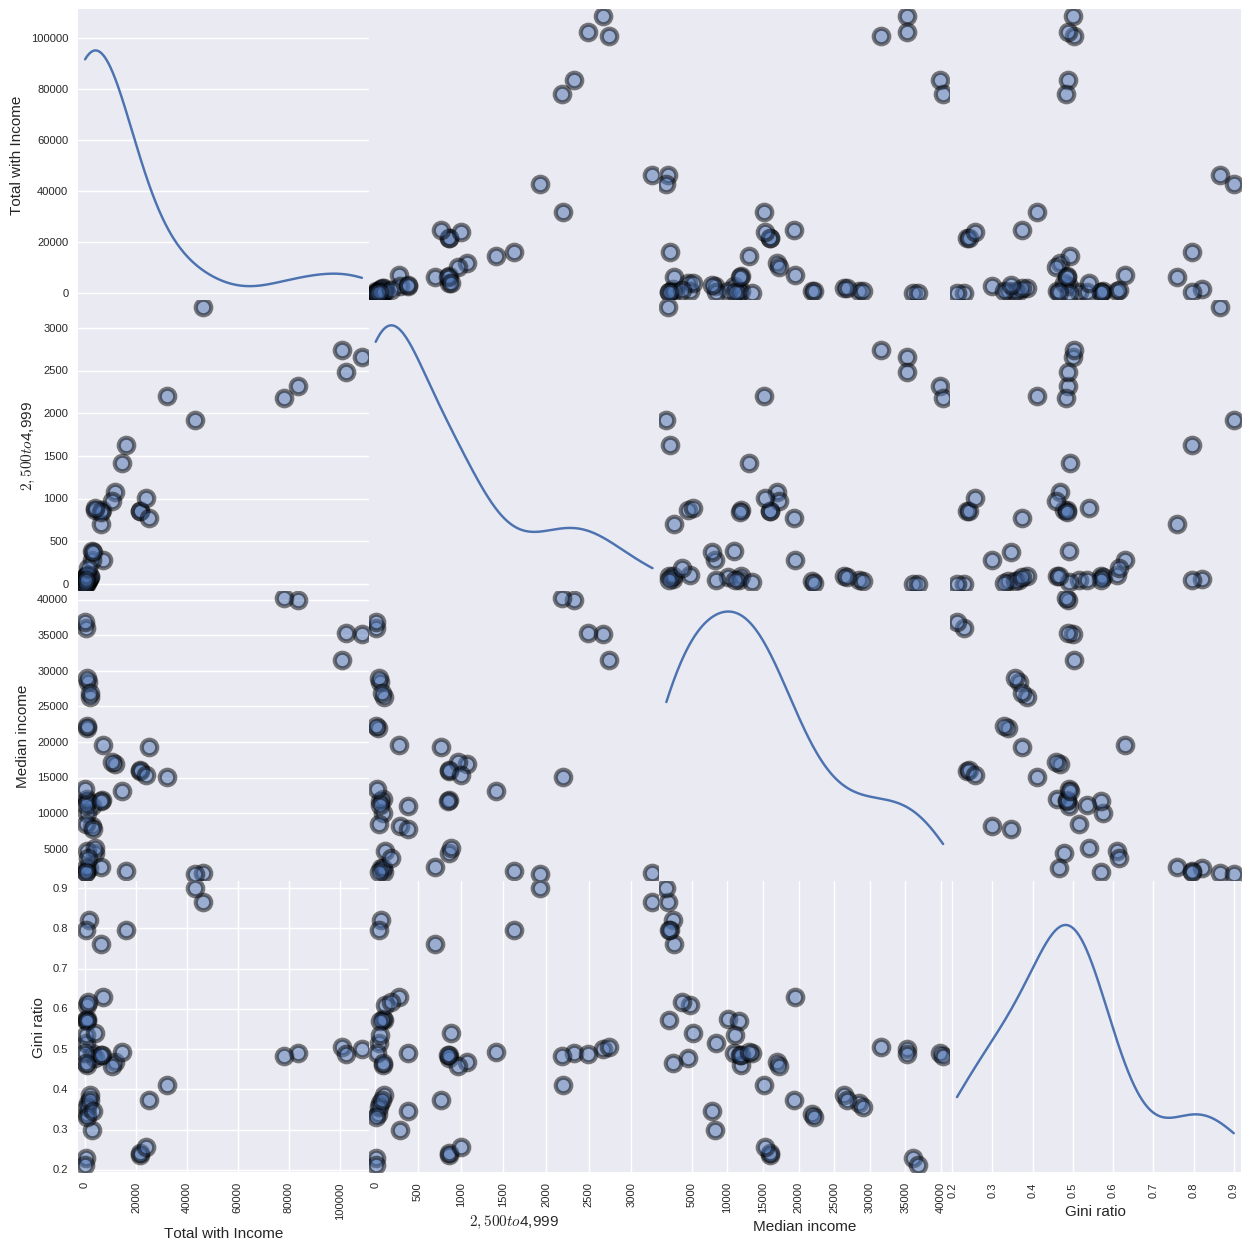

In [15]:
# use scatter_matrix to make this plot... 
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# Figure 1: Plots of Total Number of Males, Total Number of Males with Income in the $\$2,500- \$4,999$ range, Median Income and Gini Ratio as they relate to each other

# do the same for all female


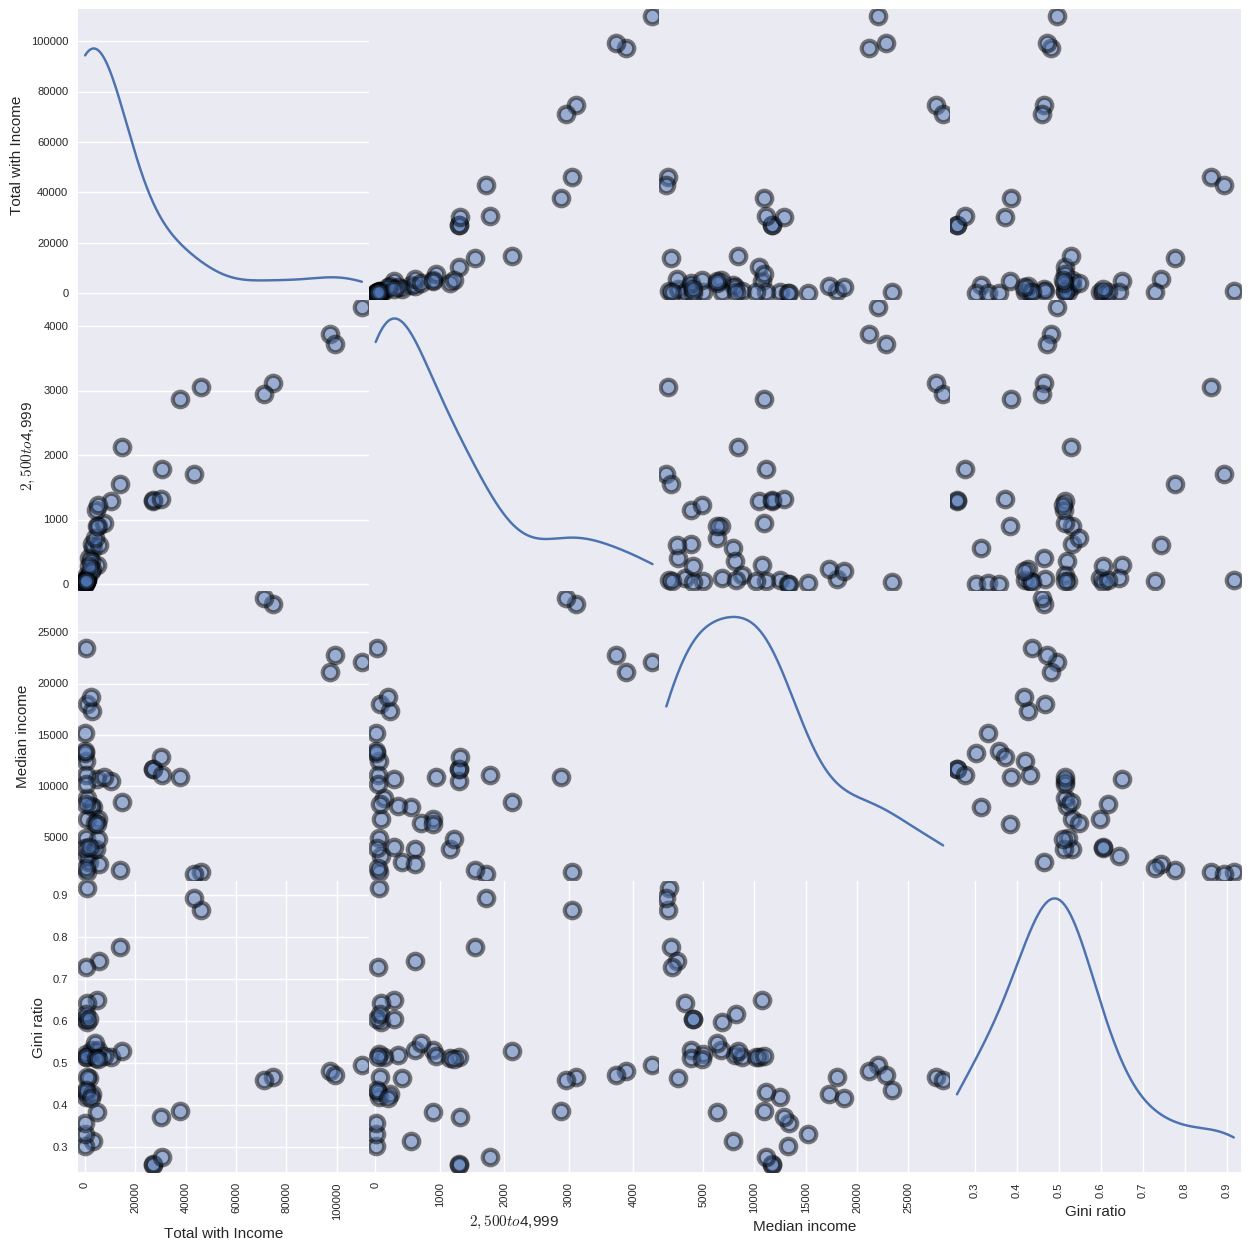

In [17]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# Figure 2: Plots of Total Number of Females, Total Number of Females with Income in the $\$2,500- \$4,999$ range, Median Income and Gini Ratio as they relate to each other

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

(17000, 30000)

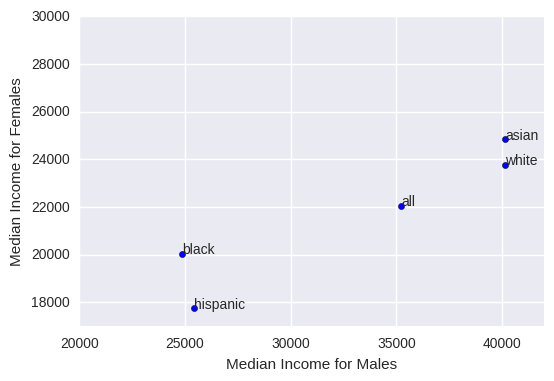

In [19]:
##plotting the Total median incame by race
##pl.scatter...

for key in keys:
    pl.scatter(allmales[key]['Median income'][1], allfemales[key]['Median income'][1])
    pl.annotate(key, (allmales[key]['Median income'][1], allfemales[key]['Median income'][1]), horizontalalignment = 'left')

pl.xlabel('Median Income for Males')
pl.ylabel('Median Income for Females')
pl.xlim(20000, 42000)
pl.ylim(17000, 30000)


# Figure 3: Plot of Total Median Income for Females v. Males by Race

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [21]:
#fit with whichever method you prefer and plot here
#[...]

women_median = [0.0]
men_median = [0.0]

index = np.array([0.0] + keys)



for key in keys:
    '''
    creates dataframe of men and women median incomes by category for later analysis
    '''
    women_median.append(allfemales[key]['Median income'][1])
    men_median.append(allmales[key]['Median income'][1])

df = pd.DataFrame({'Women_Median': women_median,
                   'Men_Median': men_median,},
                   columns = ['Women_Median', 'Men_Median'], index = index)



The equation for the line is y = 0.5938435043428667x + 1674.6926880978863


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)


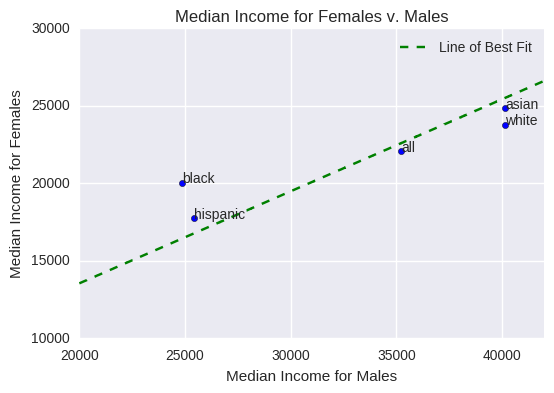

In [22]:
np.random.seed(56)
x_bar = df.Men_Median.mean()
y_bar = df.Women_Median.mean()
df.append(pd.DataFrame([0,0]))
df['Women_Median_Sq'] = np.square(df.Women_Median)
df['Men_Median_Sq'] = np.square(df.Men_Median)
df['XY'] = df.Men_Median * df.Women_Median
sxx = df.Men_Median_Sq.sum() - np.square(df.Men_Median.sum())/6
sxy = df.XY.sum() - (df.Men_Median.sum() * df.Women_Median.sum()) / 6
a = sxy/sxx
b = y_bar - a*x_bar
print('The equation for the line is y = {0}x + {1}'.format(a, b))
x_new = arange(0, 50000, 5)

def line(a, b, x):
    y = a*x + b + np.random.randn(len(x))*2
    return y

def residuals(data, model, error = None):
    
    actual = list(data.iloc[:,0])
    predicted = model
    residuals = (actual - predicted)**2
    print (residuals)
    return residuals

for key in keys:
    pl.scatter(allmales[key]['Median income'][1], allfemales[key]['Median income'][1])
    pl.annotate(key, (allmales[key]['Median income'][1], allfemales[key]['Median income'][1]), horizontalalignment = 'left')

pl.title('Median Income for Females v. Males')
pl.xlabel('Median Income for Males')
pl.ylabel('Median Income for Females')
pl.xlim(20000, 42000)
pl.ylim(10000, 30000)
pl.plot(x_new, line(a, b, x_new), 'g--', label = 'Line of Best Fit')
pl.legend()

# Figure 4: Plot of Median Income for Females v. Males with Line of Best Fit calculated manually and Intercept through the origin

Men_Median    0.642322
dtype: float64


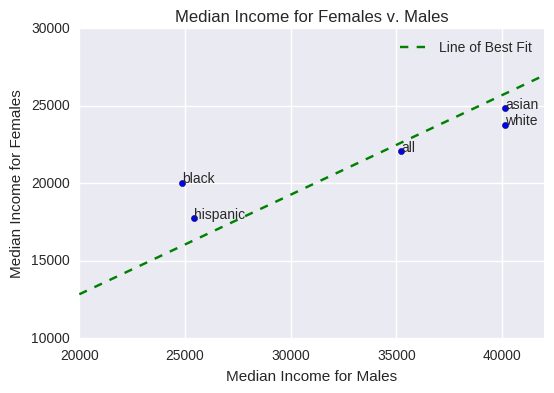

In [23]:
mod = sm.OLS(df.Women_Median, df.Men_Median)
res = mod.fit()
#print (res.summary())
pl.xlabel('Median Income for Males')
pl.ylabel('Median Income for Females')
pl.title('Median Income for Females v. Males')
pl.xlim(20000, 42000)
pl.ylim(10000, 30000)
x_new = np.arange(0, 50000, 5)
for key in keys:
    pl.scatter(allmales[key]['Median income'][1], allfemales[key]['Median income'][1])
    pl.annotate(key, (allmales[key]['Median income'][1], allfemales[key]['Median income'][1]), horizontalalignment = 'left')
pl.plot(x_new, res.predict(x_new), 'g--', label = 'Line of Best Fit')
pl.legend()
print (res.params)

# Figure 5: Median Income for Females v. Males with Line of Best Fit as calculated by Statsmodels

# there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula!

In [24]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

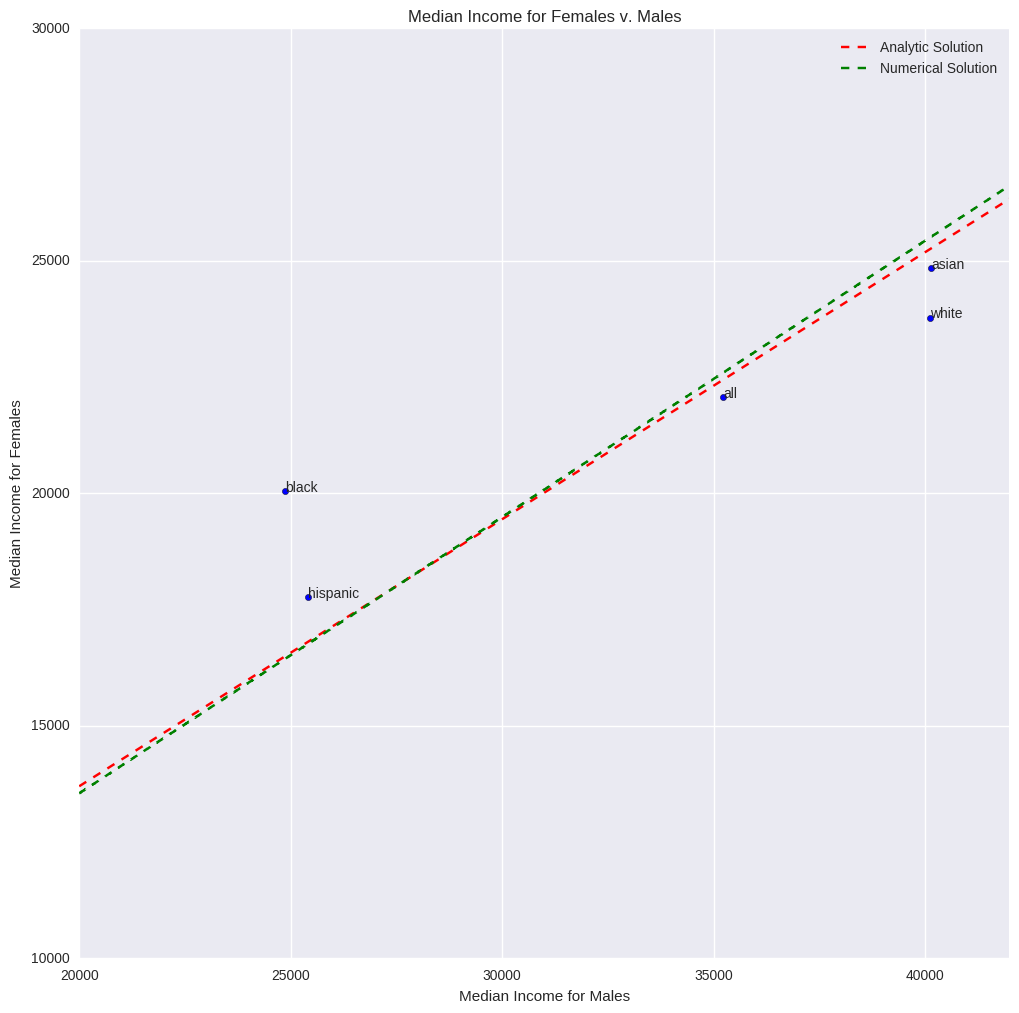

In [25]:
fig = pl.figure(figsize = (12,12))
for key in keys:
    pl.scatter(allmales[key]['Median income'][1], allfemales[key]['Median income'][1])
    pl.annotate(key, (allmales[key]['Median income'][1], allfemales[key]['Median income'][1]), horizontalalignment = 'left')
pl.title('Median Income for Females v. Males')
pl.xlabel('Median Income for Males')
pl.ylabel('Median Income for Females')
pl.xlim(20000, 42000)
pl.ylim(10000, 30000)
pl.plot(x_new, beta0 + beta1 * x_new, 'r--', label = 'Analytic Solution')
pl.plot(x_new, line(a, b, x_new), 'g--', label = 'Numerical Solution')
pl.legend()


# Figure 6: Plot of Total Median Income for Females v. Males with Numerically and Analytically Calculated lines of best fit

In [26]:
residuals_numerical = residuals(df, b + a * df.Men_Median)
residuals_analytic = residuals(df, beta0 + beta1*df.Men_Median)
residuals_numerical - residuals_analytic

0.0         2.804596e+06
all         2.826110e+05
white       2.961434e+06
black       1.302724e+07
asian       4.614362e+05
hispanic    9.943082e+05
Name: Men_Median, dtype: float64
0.0         4.947782e+06
all         1.447128e+05
white       2.167709e+06
black       1.263201e+07
asian       1.849918e+05
hispanic    9.082834e+05
Name: Men_Median, dtype: float64


0.0        -2.143186e+06
all         1.378982e+05
white       7.937247e+05
black       3.952289e+05
asian       2.764444e+05
hispanic    8.602480e+04
Name: Men_Median, dtype: float64

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [28]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [29]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

# I just created a data frame of all the incomes and then used the built in dropna function rather than the provide code
df_allincomes = pd.DataFrame({'Women_Median': [0.0],
                              'Men_Median': [0.0],
                               'Race': ['-']},
                            columns = ['Women_Median', 'Men_Median', 'Race'])
for key in keys:
    '''
    creates dataframe of men and women median incomes (all varieties) by category for later analysis
    '''
    
    df_concat = pd.concat([allfemales[key]['Median income'], allmales[key]['Median income'], pd.DataFrame([key]*48)], axis = 1)
    df_concat.columns = ['Women_Median', 'Men_Median', 'Race']
    df_concat.level = key
    df_allincomes = df_allincomes.append(df_concat)
    

df_allincomes.dropna(axis = 0, inplace = True)
df_allincomes.reset_index(inplace = True, drop = True)
df_allincomes.head()

,Women_Median,Men_Median,Race
0,0.0,0.0,-
1,22063.0,35228.0,all
2,27736.0,39903.0,all
3,28402.0,40298.0,all
4,10732.0,19557.0,all


In [30]:
cor = stats.spearmanr(df_allincomes.Men_Median, df_allincomes.Women_Median)
beta_1 = cor[0] * df_allincomes.Women_Median.std() / df_allincomes.Men_Median.std()
beta_0 = df_allincomes.Women_Median.mean() - beta1 * df_allincomes.Men_Median.mean()
beta_0, beta_1

(2006.3003332079097, 0.62339385549588766)

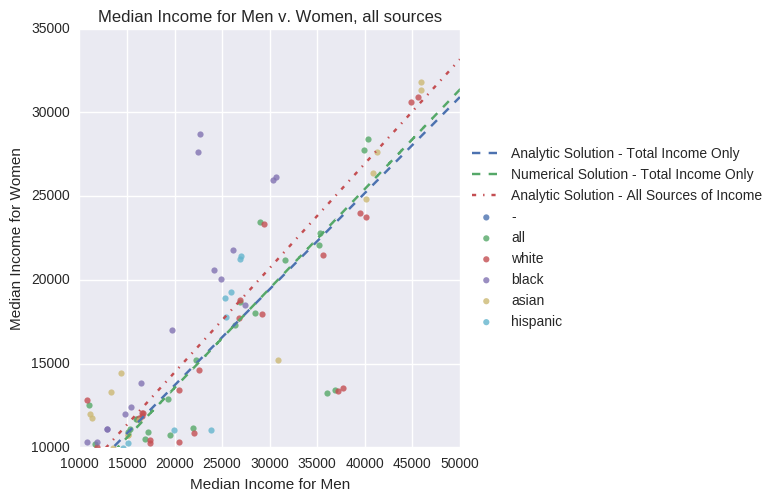

In [31]:
seaborn.lmplot('Men_Median', 'Women_Median', data=df_allincomes, hue = 'Race', fit_reg = False, legend = False)
pl.xlim(10000, 50000)
pl.ylim(10000, 35000)
pl.xlabel('Median Income for Men')
pl.ylabel('Median Income for Women')
pl.title('Median Income for Men v. Women, all sources')
pl.plot(x_new, beta0 + beta1 * x_new, '--', label = 'Analytic Solution - Total Income Only')
pl.plot(x_new, line(a, b, x_new), '--', label = 'Numerical Solution - Total Income Only')
pl.plot(x_new, beta_0 + beta_1 * x_new, '-.', label = 'Analytic Solution - All Sources of Income')
pl.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))



## Figure 7: Plot of Median Income of Women v. Men for all types of income as color-coded by race, including lines of best fit for entire data and total income only. 

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [33]:
y1 = b + a*50000
y2 = beta0 + beta_1*50000
y3 = beta_0 + beta_1*50000

print ('Total Income Numerical solution: ${0:.1f}, Total Income Analytic Solution: ${1:.1f}'.format(y1, y2) +
       ' All Sources of Income Analytic Solution: ${0:.1f}'.format (y3))

Total Income Numerical solution: $31366.9, Total Income Analytic Solution: $33394.1 All Sources of Income Analytic Solution: $33176.0


## 7. lastly do you have any comments about what these data tell us about race?
how you would go about analyzing race differences with these data? (just a few sentences)

Although there is a discrepancy in male-female income for all races, there is also a very big discrepancy in Median income by race. We could create Boolean variables for each race that would each have a different coefficient to determine how much of the discrepancy is related solely to gender v. race as well. We could also do a separate analysis on the impact of race on median income. 